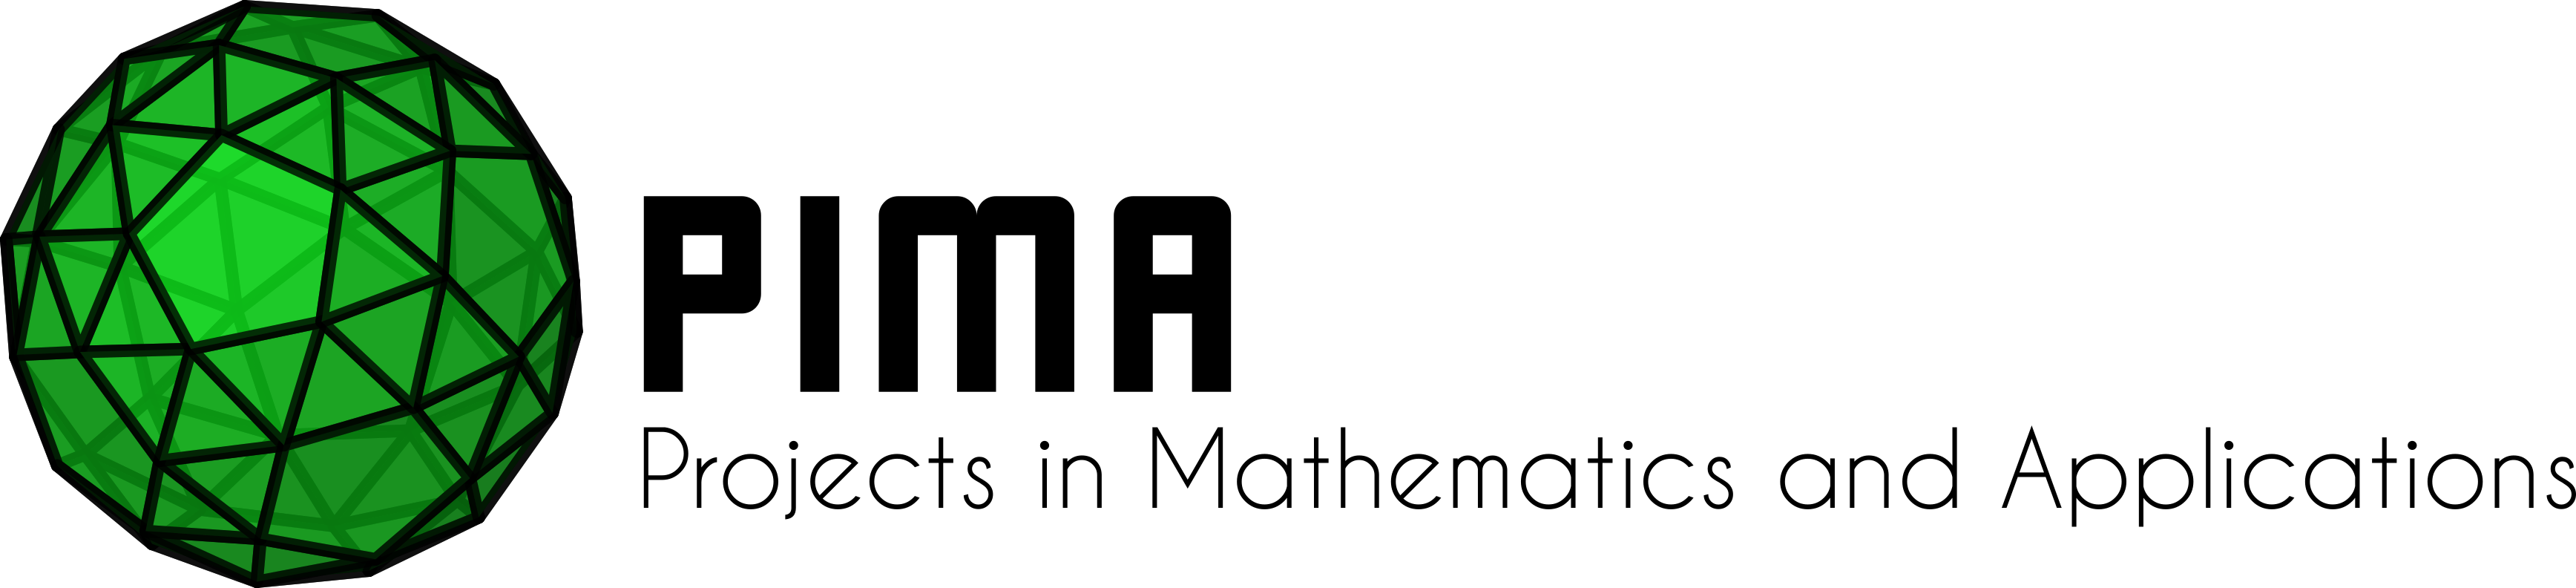

# Chu·∫©n b·ªã tr√¨nh ch·∫•m b√†i v√† th√¥ng tin h·ªçc vi√™n

In [1]:
import shutil
import subprocess
import sys

# # Clean up old folders if they exist
# shutil.rmtree("PiMA-GenAI-Grader", ignore_errors=True)
# shutil.rmtree("grader_homework_3", ignore_errors=True)

# # Clone the GitHub repo
# subprocess.run(["git", "clone", "https://github.com/vongvinhtoan/PiMA-GenAI-Grader.git"], check=True)

# # Move the folder
# shutil.move("PiMA-GenAI-Grader/grader_homework_3", "./grader_homework_3")

# Install requirements
subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", "./grader_homework_3/requirements.txt", "--quiet"])

print("")


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# Import c√°c th∆∞ vi·ªán

In [2]:
from typing import *
import numpy as np
from tqdm import tqdm

T = TypeVar("T")

# Gi·ªõi thi·ªáu b√†i t·∫≠p

Trong b√†i t·∫≠p v·ªÅ nh√† l·∫≠p tr√¨nh tu·∫ßn n√†y, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng ng√¥n ng·ªØ l·∫≠p tr√¨nh Python ƒë·ªÉ c√†i ƒë·∫∑t 2 thu·∫≠t to√°n l·∫•y m·∫´u ng·∫´u nhi√™n c·ªßa m·ªôt ph√¢n ph·ªëi $p(\mathbf x)$. Tuy nhi√™n trong m·ªôt thi·∫øt l·∫≠p b√†i to√°n, ta kh√¥ng c√≥ th√¥ng tin to√†n v·∫πn v·ªÅ ph√¢n ph·ªëi $p(\mathbf x)$ m√† ch·ªâ c√≥ m·ªôt h√†m $f(\mathbf x)$ sao cho $p(\mathbf x) \propto f(\mathbf x)$ hay $p(\mathbf x) = \frac{f(\mathbf x)}{Z}$ v·ªõi $Z=\int f(\mathbf x) d\mathbf x$ l√† h·∫±ng s·ªë chu·∫©n h√≥a.

Tuy nhi√™n, ƒë·ªÉ l·∫•y m·∫´u ng·∫´u nhi√™n t·ª´ ph√¢n ph·ªëi $p(\mathbf x)$, ta c·∫ßn bi·∫øt gi√° tr·ªã c·ªßa $Z$, ƒëi·ªÅu n√†y c√≥ th·ªÉ r·∫•t kh√≥ khƒÉn ho·∫∑c kh√¥ng th·ªÉ th·ª±c hi·ªán ƒë∆∞·ª£c. Do ƒë√≥, trong b√†i t·∫≠p n√†y, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng 2 thu·∫≠t to√°n l·∫•y m·∫´u ng·∫´u nhi√™n l√† Metropolis-Hastings (MH) v√† Metropolis-adjusted Langevin algorithm (MALA) ƒë·ªÉ l·∫•y m·∫´u ng·∫´u nhi√™n t·ª´ ph√¢n ph·ªëi $p(\mathbf x)$ m√† kh√¥ng c·∫ßn bi·∫øt gi√° tr·ªã c·ªßa $Z$.

H∆°n n·ªØa, v√¨ thu·∫≠t to√°n MALA s·ª≠ d·ª•ng gradient c·ªßa h√†m $f(\mathbf x)$, b√†i t·∫≠p n√†y s·∫Ω y√™u c·∫ßu b·∫°n c√†i ƒë·∫∑t m·ªôt h√†m gradient cho h√†m $f(\mathbf x)$ ·ªü [B√†i t·∫≠p 2](#b√†i-t·∫≠p-2).

Nh∆∞ b√†i t·∫≠p coding tr∆∞·ªõc, trong Notebook n√†y s·∫Ω xu·∫•t hi·ªán c√°c d√≤ng code ch√∫ th√≠ch b·∫Øt ƒë·∫ßu b·∫±ng c·ª•m t·ª´ `TODO` k√®m theo y√™u c·∫ßu, nhi·ªám v·ª• c·ªßa b·∫°n l√† ho√†n th√†nh c√°c y√™u c·∫ßu ƒë√≥.

B√†i t·∫≠p v·ªÅ nh√† l·∫≠p tr√¨nh tu·∫ßn c√≥ **3** b√†i t·∫≠p.

# B√†i t·∫≠p 1

### Import tr√¨nh ch·∫•m

In [3]:
from grader_homework_3.grade_p1 import hidden_function, plot_samples

### N·ªôi dung

Trong b√†i t·∫≠p n√†y, h·ªçc vi√™n ƒë∆∞·ª£c y√™u c·∫ßu ho√†n th√†nh h√†m `MHSampler.sample()` trong l·ªõp `MHSampler` ƒë·ªÉ th·ª±c hi·ªán thu·∫≠t to√°n Metropolis-Hastings nh·∫±m l·∫•y m·∫´u ng·∫´u nhi√™n t·ª´ ph√¢n ph·ªëi $p(\mathbf x)$ t·ª∑ l·ªá thu·∫≠n v·ªõi h√†m ·∫©n `hidden_function(x, y)` ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a ·∫©n trong tr√¨nh ch·∫•m.

C√°c ph·∫ßn c√†i ƒë·∫∑t v·ªÅ tham s·ªë truy·ªÅn v√†o ƒë√£ ƒë∆∞·ª£c th·ª±c hi·ªán s·∫µn, h·ªçc vi√™n c√≥ th·ªÉ thay ƒë·ªïi c√°c thi·∫øt l·∫≠p c·ªßa l·ªõp `MHSampler` t√πy √Ω, tuy nhi√™n ƒëi·ªÅu n√†y kh√¥ng ƒë∆∞·ª£c khuy·∫øn kh√≠ch n·∫øu kh√¥ng c·∫ßn thi·∫øt.

C√°c ƒë·∫∑c t√≠nh c·ªßa h√†m `hidden_function(x, y)` ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a nh∆∞ sau:
- H√†m n√†y nh·∫≠n v√†o 2 tham s·ªë ƒë·∫ßu v√†o l√† `x` v√† `y` l√† c√°c gi√° tr·ªã th·ª±c.
- H√†m n√†y tr·∫£ v·ªÅ m·ªôt gi√° tr·ªã th·ª±c l√† gi√° tr·ªã c·ªßa h√†m ·∫©n t·∫°i ƒëi·ªÉm $(x, y)$.
- H√†m c√≥ gi√° tr·ªã ƒë·∫£m b·∫£o b·∫±ng 0 t·∫°i c√°c ƒëi·ªÉm n·∫±m ngo√†i $[0, 1036) \times [0, 777)$.

<div style='background-color: #fff8dc; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid orange;'>    
    <h3 style='margin: 0; color: orange;'>üí° G·ª£i √Ω</h2>
    <p>H√£y suy nghƒ© ƒë·∫øn s·ª± t·ªìn t·∫°i c·ªßa tham s·ªë <code>is_symmetric</code>, li·ªáu n√≥ c√≥ th·ªÉ gi·∫£n l∆∞·ª£c ƒë∆∞·ª£c c√†i ƒë·∫∑t g·ªëc c·ªßa MH kh√¥ng?</p>
</div>

### C√†i ƒë·∫∑t Metropolis-Hastings sampler

In [4]:
class MHSampler(Generic[T]):
    def __init__(
        self,
        x0: T,
        q_sampler: Callable[[T], T],
        f: Callable[[T], float],
        q: Callable[[T, T], float] = None,
        is_symmetric: bool = False,
    ):
        """
        Metropolis-Hastings Sampler
        Th·ª±c hi·ªán l·∫•y m·∫´u t·ª´ ph√¢n ph·ªëi m·ª•c ti√™u $p(x)$ th√¥ng qua ph√¢n ph·ªëi ƒë·ªÅ xu·∫•t $q(x'|x)$

        Parameters
        ----------
        x0 : T
            Tr·∫°ng th√°i kh·ªüi t·∫°o ƒë∆∞·ª£c l·∫•y m·∫´u t·ª´ ph√¢n ph·ªëi ti·ªÅn nghi·ªám
        q_sampler : (T) -> T
            H√†m l·∫•y m·∫´u t·ª´ ph√¢n ph·ªëi ƒë·ªÅ xu·∫•t
        f : (T) -> float
            H√†m t·ª∑ l·ªá thu·∫≠n v·ªõi h√†m m·∫≠t ƒë·ªô x√°c su·∫•t m·ª•c ti√™u $p(x)$
        q : (T, T) -> float, optional
            H√†m x√°c su·∫•t c·ªßa ph√¢n ph·ªëi ƒë·ªÅ xu·∫•t, n·∫øu `is_symmetric` l√† True th√¨ kh√¥ng c·∫ßn thi·∫øt
        is_symmetric : bool, optional
            N·∫øu b·∫±ng True nghƒ©a l√† $q(x'|x) = q(x|x')$, th√¨ kh√¥ng c·∫ßn truy·ªÅn v√†o h√†m `q`, m·∫∑c ƒë·ªãnh l√† False
        """
        self.x_current = x0
        self.q_sampler = q_sampler
        self.q = q
        self.f = f
        self.is_symmetric = is_symmetric

    def burn_in(self, steps: int) -> None:
        """
        Th·ª±c hi·ªán b∆∞·ªõc "burn-in" ƒë·ªÉ lo·∫°i b·ªè c√°c m·∫´u kh√¥ng c·∫ßn thi·∫øt

        Parameters
        ----------
        steps : int
            S·ªë b∆∞·ªõc "burn-in" c·∫ßn th·ª±c hi·ªán
        """
        for _ in tqdm(range(steps), desc='Burning in'):
            self.sample()

    def sample(self) -> T:
        x_current = self.x_current
        x_proposed = np.array(self.q_sampler(x_current))
        f_current = self.f(x_current)
        f_proposed = self.f(x_proposed)

        if self.is_symmetric:
            alpha = min(1, f_proposed / f_current) if f_current > 0 else 0
        else:
            q_current_given_proposed = self.q(x_proposed, x_current)
            q_proposed_given_current = self.q(x_current, x_proposed)
            alpha = min(1, (f_proposed * q_current_given_proposed) / (f_current * q_proposed_given_current)) if f_current > 0 and q_proposed_given_current > 0 else 0

        u = np.random.uniform(0, 1)
        if u < alpha:
            self.x_current = x_proposed
        return self.x_current

### Thi·∫øt l·∫≠p l·∫•y m·∫´u

In [5]:
# Kh·ªüi t·∫°o Metropolis-Hastings Sampler
std = 200
mh_sampler = MHSampler[np.ndarray](
    x0           = np.array([500, 350]),
    q_sampler    = lambda x: (x[0] + np.random.normal(0, std), x[1] + np.random.normal(0, std)),
    f            = lambda p: hidden_function(*p),
    # q            = lambda x, y: np.exp(-((x[0]-y[0])**2 + (x[1]-y[1])**2) / (2 * std**2)),
    is_symmetric = True
)

# Pha "burn-in"
mh_sampler.burn_in(1000)

# Pha l·∫•y m·∫´u
p1_samples = [
    mh_sampler.sample()
    for _ in tqdm(range(1_000_000), desc='Metropolis-Hastings Sampling')
]

Metropolis-Hastings Sampling: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000000/1000000 [00:02<00:00, 338757.97it/s]


### V·∫Ω bi·ªÉu ƒë·ªì nhi·ªát c·ªßa c√°c ƒëi·ªÉm ƒë√£ l·∫•y m·∫´u

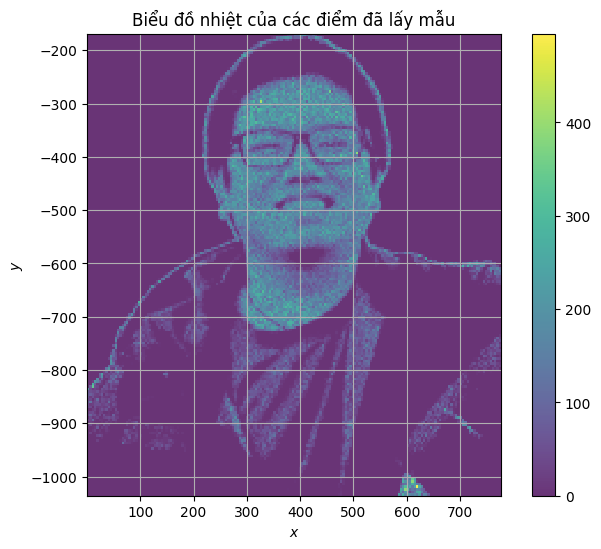

In [6]:
plot_samples(p1_samples)

_Who's that pokemon?_

# B√†i t·∫≠p 2

### Import tr√¨nh ch·∫•m

In [7]:
from grader_homework_3.grade_p2 import (
    plot_function_conture,
    plot_function_derivative_vector_field,
    test_function_contour,
    test_function_derivative_vector_field,
)

### N·ªôi dung

B√†i t·∫≠p n√†y s·∫Ω y√™u c·∫ßu h·ªçc vi√™n chu·∫©n b·ªã h√†m $f: \mathbb{R}^2 \to \mathbb{R}$ v√† h√†m gradient c·ªßa n√≥ ƒë·ªÉ s·ª≠ d·ª•ng trong [B√†i t·∫≠p 3](#b√†i-t·∫≠p-3).

#### T·ªïng quan v·ªÅ h√†m $f(\mathbf x)$

$$
f(x, y) = \sin^2\left(3\exp\left\{-\frac{x^2+y^2+xy}{4}\right\}\right) + \sin^2\left(3\exp\left\{-\frac{x^2+y^2-xy}{4}\right\}\right)
$$

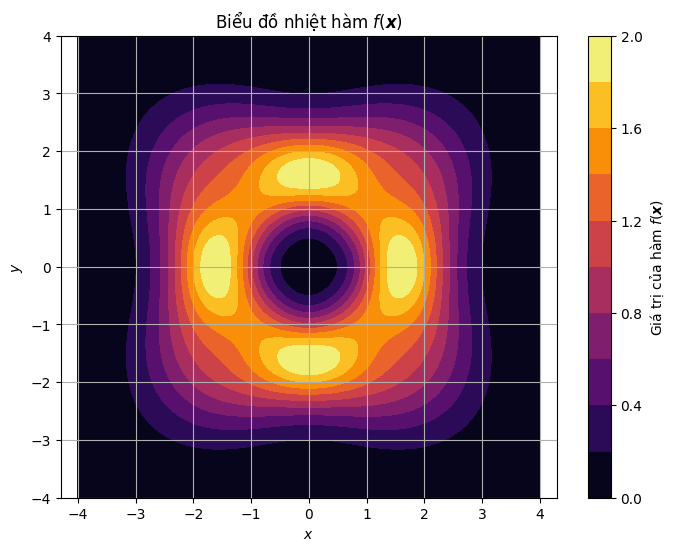

In [8]:
plot_function_conture()

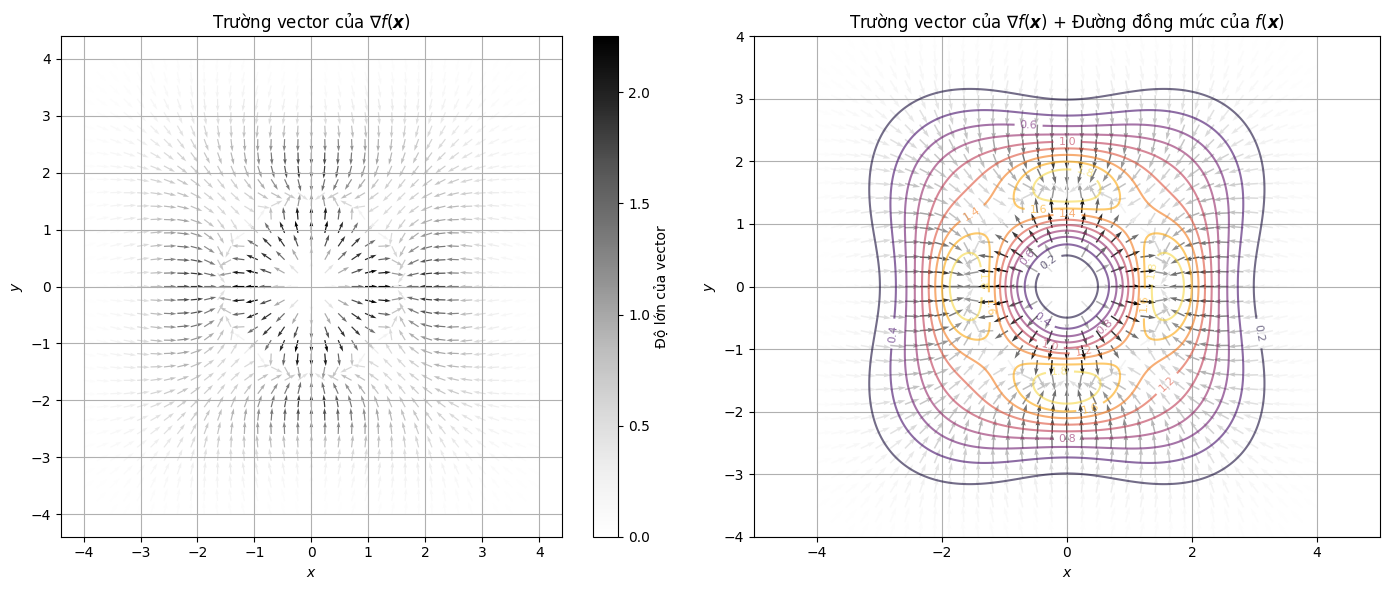

In [9]:
plot_function_derivative_vector_field()

### Ph·∫ßn 1: C√†i ƒë·∫∑t h√†m $f(\mathbf x)$

In [10]:
def f(x: np.ndarray) -> float:
    x_val, y_val = x[0], x[1]
    term1 = np.sin(3 * np.exp( - (x_val**2 + y_val**2 + x_val*y_val)/4 )) ** 2
    term2 = np.sin(3 * np.exp( - (x_val**2 + y_val**2 - x_val*y_val)/4 )) ** 2
    return term1 + term2

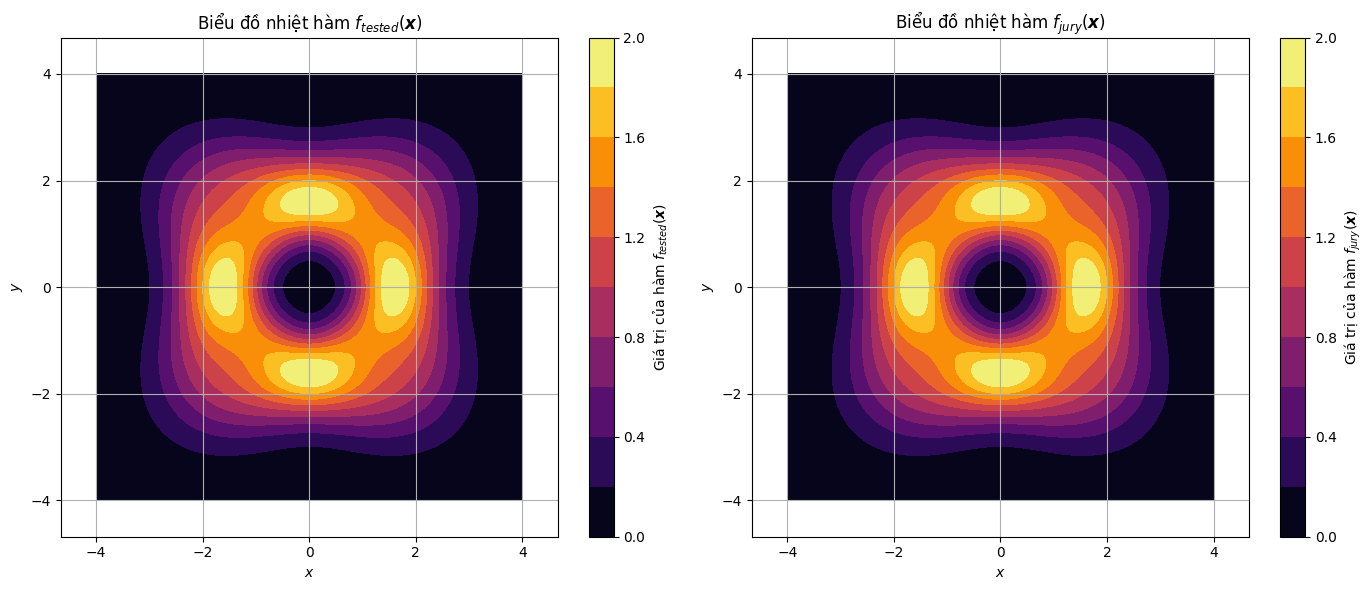

In [11]:
test_function_contour(f)

### Ph·∫ßn 2: C√†i ƒë·∫∑t h√†m $\nabla f(\mathbf x)$

Ph·∫ßn b√†i t·∫≠p n√†y s·∫Ω c√≥ y√™u c·∫ßu ƒë·∫∑c bi·ªát. ƒê·ªÉ l√†m quen v·ªõi vi·ªác t√≠nh gradient c·ªßa m·ªôt h√†m (v√≠ d·ª• nh∆∞ m·ªôt Neural Network), b√†i t·∫≠p s·∫Ω y√™u c·∫ßu b·∫°n c√†i ƒë·∫∑t h√†m `grad_f` b·∫±ng th∆∞ vi·ªán `torch`, c·ª• th·ªÉ l√† v·ªõi "framework" `torch.autograd`. Tuy nhi√™n, b√†i t·∫≠p n√†y s·∫Ω kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn [B√†i t·∫≠p 3](#b√†i-t·∫≠p-3), chi ti·∫øt xem t·∫°i n·ªôi dung b√†i t·∫≠p v·ª´a ƒë∆∞·ª£c ƒë·ªÅ c·∫≠p.

<div style='background-color: #e6f7ff; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid #1890ff;'>    
    <h3 style='margin: 0; color: #1890ff;'>‚ÑπÔ∏è <code>torch.autograd</code></h3>
    <p>ƒê·ªÉ t√¨m hi·ªÉu th√™m v·ªÅ c√°ch s·ª≠ d·ª•ng <code>torch.autograd</code>, b·∫°n c√≥ th·ªÉ tham kh·∫£o t·∫°i
        <a href='https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html' target='_blank'>Trang ch·ªß PyTorch - <code>torch.autograd</code></a>.
    </p>
    <p>
        C·ª• th·ªÉ h∆°n b·∫°n c√≥ th·ªÉ t·∫≠p trung ƒë·ªçc t·∫°i:
    </p>
    <ul>
        <li><a href='https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#differentiation-in-autograd' target='_blank'>Differentiation in Autograd.</li>
        <li><a href='https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#optional-reading-vector-calculus-using-autograd' target='_blank'>Optional Reading - Vector Calculus using <code>autograd</code></a>.</li>
    </ul>
</div>

<div style='background-color: #ffcccc; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid red;'>
    <h3 style='margin: 0; color: red;'>‚ùó C·∫£nh b√°o</h2>
    <p>H√£y c·∫©n th·∫≠n v·ªõi ki·ªÉu d·ªØ li·ªáu truy·ªÅn v√†o v√† ki·ªÉu d·ªØ li·ªáu tr·∫£ v·ªÅ!</p>
</div>

In [12]:
import torch

# def grad_f(x: np.ndarray) -> np.ndarray:
#     """
#     T√≠nh ƒë·∫°o h√†m c·ªßa h√†m t·ª∑ l·ªá thu·∫≠n v·ªõi h√†m m·∫≠t ƒë·ªô x√°c su·∫•t m·ª•c ti√™u $p(x)$
#     """
#     # TODO: H√£y ho√†n th√†nh h√†m n√†y
#     if x.ndim == 1:
#         x = x.reshape(2, 1)
#     grad = np.zeros_like(x, dtype=np.float64)

#     for i in range(x.shape[1]):

#         point = torch.tensor(x[:, i], dtype=torch.float64, requires_grad=True)
#         term1 = torch.sin(3 * torch.exp(-(point[0]**2 + point[1]**2 + point[0]*point[1])/4))**2
#         term2 = torch.sin(3 * torch.exp(-(point[0]**2 + point[1]**2 - point[0]*point[1])/4))**2
#         f_torch = term1 + term2
#         f_torch.backward()
#         grad[:, i] = point.grad.numpy()
#         if point.grad is not None:
#             point.grad.zero_()
#     if x.shape[1] == 1:
#         grad = grad[:, 0]
#     return grad

def grad_f(x: np.ndarray) -> np.ndarray:
    """
    T√≠nh ƒë·∫°o h√†m c·ªßa h√†m t·ª∑ l·ªá thu·∫≠n v·ªõi h√†m m·∫≠t ƒë·ªô x√°c su·∫•t m·ª•c ti√™u p(x)
    m√† kh√¥ng d√πng v√≤ng l·∫∑p for.
    """
    if x.ndim == 1:
        x = x.reshape(2, 1)
    x_tensor = torch.tensor(x.T, dtype=torch.float64, requires_grad=True)  # shape: (N, 2)

    x0 = x_tensor[:, 0]
    x1 = x_tensor[:, 1]

    exp1 = torch.exp(-(x0**2 + x1**2 + x0*x1) / 4)
    exp2 = torch.exp(-(x0**2 + x1**2 - x0*x1) / 4)

    term1 = torch.sin(3 * exp1)**2
    term2 = torch.sin(3 * exp2)**2
    f = term1 + term2

    f.sum().backward()  # t·ªïng ƒë·ªÉ backward m·ªôt l·∫ßn

    grad = x_tensor.grad.T.numpy()
    if grad.shape[1] == 1:
        grad = grad[:, 0]
    return grad

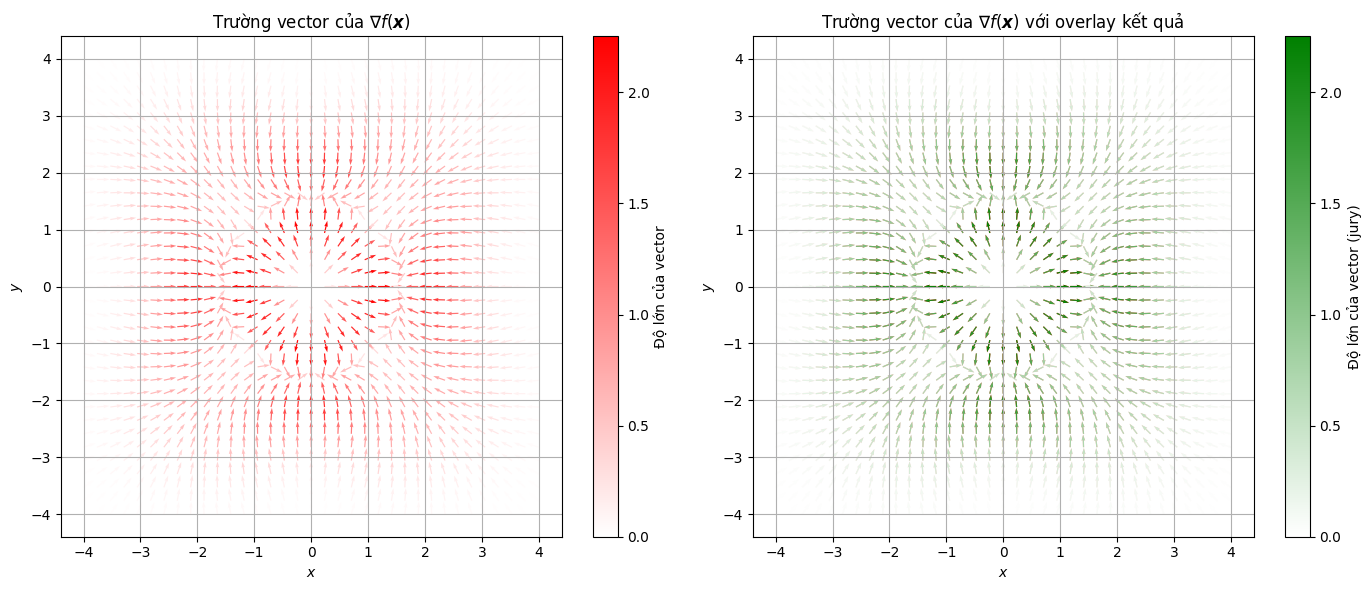

In [13]:
test_function_derivative_vector_field(grad_f)

# B√†i t·∫≠p 3

### Import tr√¨nh ch·∫•m

In [14]:
from grader_homework_3.grade_p3 import plot_samples_with_contour, grad_f_fast

### N·ªôi dung

Trong b√†i t·∫≠p n√†y, h·ªçc vi√™n ƒë∆∞·ª£c y√™u c·∫ßu ho√†n th√†nh h√†m `MALASampler.sample()` trong l·ªõp `MALASampler` ƒë·ªÉ th·ª±c hi·ªán thu·∫≠t to√°n Metropolis-adjusted Langevin algorithm nh·∫±m l·∫•y m·∫´u ng·∫´u nhi√™n t·ª´ ph√¢n ph·ªëi $p(\mathbf x)$ t·ª∑ l·ªá thu·∫≠n v·ªõi h√†m $f(\mathbf x)$ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a trong [B√†i t·∫≠p 2](#b√†i-t·∫≠p-2).

C√°c ph·∫ßn c√†i ƒë·∫∑t v·ªÅ tham s·ªë truy·ªÅn v√†o ƒë√£ ƒë∆∞·ª£c th·ª±c hi·ªán s·∫µn, h·ªçc vi√™n c√≥ th·ªÉ thay ƒë·ªïi c√°c thi·∫øt l·∫≠p c·ªßa l·ªõp `MHSampler` t√πy √Ω, tuy nhi√™n ƒëi·ªÅu n√†y kh√¥ng ƒë∆∞·ª£c khuy·∫øn kh√≠ch n·∫øu kh√¥ng c·∫ßn thi·∫øt.

Trong ph·∫ßn b√†i t·∫≠p n√†y, b·∫±ng ph√©p thu·∫≠t PIMA (vi·∫øt t·∫Øt cho **P**rovably-efficient **I**mplementation for **M**ala **A**utodifferentiation), tr√¨nh ch·∫•m ƒë√£ cho tr∆∞·ªõc h√†m `grad_f_fast` ($\nabla f(\mathbf x)$) v·ªõi t·ªëc ƒë·ªô ch·∫°y nhanh h∆°n, v√¨ th·∫ø b·∫°n c√≥ th·ªÉ kh√¥ng c·∫ßn ho√†n th√†nh [B√†i t·∫≠p 2 - Ph·∫ßn 2](#ph·∫ßn-2-c√†i-ƒë·∫∑t-h√†m) ƒë·ªÉ c√≥ th·ªÉ ho√†n th√†nh b√†i t·∫≠p n√†y. Tuy nhi√™n vi·ªác ho√†n th√†nh t·∫•t c·∫£ b√†i t·∫≠p v·∫´n ƒë∆∞·ª£c khuy·∫øn kh√≠ch.

V·ªõi h√†m $f(\mathbf x)$ c·ª• th·ªÉ c·ªßa b√†i t·∫≠p n√†y, ph√©p thu·∫≠t PIMA ƒë√£ c√≥ th·ªÉ t√¨m ra ƒë∆∞·ª£c c√°ch c√†i ƒë·∫∑t $\nabla f(\mathbf x)$ nhanh h∆°n so v·ªõi vi·ªác s·ª≠ d·ª•ng ƒë·ªì th·ªã t√≠nh to√°n c·ªßa `torch.autograd`, tuy nhi√™n trong tr∆∞·ªùng h·ª£p tham s·ªë ƒë·∫ßu v√†o c√≥ nhi·ªÅu h∆°n 2 tham s·ªë v√† vi·ªác t√≠nh h√†m $f(\mathbf x)$ ph·ª©c t·∫°p h∆°n, vi·ªác s·ª≠ d·ª•ng `torch.autograd` s·∫Ω nhanh v√† d·ªÖ d√†ng l·∫≠p tr√¨nh h∆°n! (V·ªÅ chi ti·∫øt ph√©p thu·∫≠t PIMA, h√£y g·ª≠i c√¢u h·ªèi ƒë·∫øn QnA ch√≠nh th·ª©c c·ªßa kh√≥a h·ªçc)

### C√†i ƒë·∫∑t Metropolis-adjusted Langevin algorithm sampler

In [15]:
class MALASampler(Generic[T]):
    def __init__(
        self,
        x0 : T,
        f : Callable[[T], float],
        grad_f : Callable[[T], np.ndarray],
        eta : float,
    ):
        """
        Metropolis-adjusted Langevin algorithm (MALA) Sampler

        Th·ª±c hi·ªán l·∫•y m·∫´u t·ª´ ph√¢n ph·ªëi m·ª•c ti√™u $p(x)$ th√¥ng qua ph√¢n ph·ªëi ƒë·ªÅ xu·∫•t $q(x'|x)$

        Parameters
        ----------
        x0 : T
            Tr·∫°ng th√°i kh·ªüi t·∫°o ƒë∆∞·ª£c l·∫•y m·∫´u t·ª´ ph√¢n ph·ªëi ti·ªÅn nghi·ªám
        f : (T) -> float
            H√†m t·ª∑ l·ªá thu·∫≠n v·ªõi h√†m m·∫≠t ƒë·ªô x√°c su·∫•t m·ª•c ti√™u $p(x)$
        grad_f : (T) -> np.ndarray
            Gradient c·ªßa h√†m $f(x)$ t·ª∑ l·ªá thu·∫≠n v·ªõi h√†m m·∫≠t ƒë·ªô x√°c su·∫•t m·ª•c ti√™u $p(x)$
        eta : float
            Tham s·ªë th·ªùi gian ƒëi·ªÅu ch·ªânh, ·∫£nh h∆∞·ªüng ƒë·∫øn ƒë·ªô ph√¢n t√°n c·ªßa m·∫´u
        """
        self.x_current = x0
        self.f = f
        self.grad_f = grad_f
        self.eta = eta

    def burn_in(self, steps: int) -> None:
        """
        Th·ª±c hi·ªán b∆∞·ªõc "burn-in" ƒë·ªÉ lo·∫°i b·ªè c√°c m·∫´u kh√¥ng c·∫ßn thi·∫øt

        Parameters
        ----------
        steps : int
            S·ªë b∆∞·ªõc "burn-in" c·∫ßn th·ª±c hi·ªán
        """
        for _ in tqdm(range(steps), desc='Burning in'):
            self.sample()

    def sample(self):
        x_current = self.x_current
        f_current = self.f(x_current)
        grad_f_current = self.grad_f(x_current)
        grad_log_p_current = grad_f_current / f_current
        mu_proposed = x_current + (self.eta / 2) * grad_log_p_current
        z = np.random.normal(0, 1, size=2)
        x_proposed = mu_proposed + np.sqrt(self.eta) * z
        f_proposed = self.f(x_proposed)
        if f_proposed > 0:
            grad_f_proposed = self.grad_f(x_proposed)
            grad_log_p_proposed = grad_f_proposed / f_proposed
            mu_current = x_proposed + (self.eta / 2) * grad_log_p_proposed
            diff_current = x_current - mu_current
            diff_proposed = x_proposed - mu_proposed
            log_q_ratio = - (1 / (2 * self.eta)) * (np.sum(diff_current**2) - np.sum(diff_proposed**2))
            alpha = min(1, (f_proposed / f_current) * np.exp(log_q_ratio))
        else:
            alpha = 0
        u = np.random.uniform(0, 1)
        if u < alpha:
            self.x_current = x_proposed
        return self.x_current

### Thi·∫øt l·∫≠p l·∫•y m·∫´u

In [16]:
# Kh·ªüi t·∫°o Metropolis-adjusted Langevin algorithm Sampler
mala_sampler = MALASampler[np.ndarray](
    x0=np.array([0., 2.]),
    f=f,
    grad_f=grad_f_fast,
    eta=0.574
)

# Pha "burn-in"
mala_sampler.burn_in(1_000)

# Pha l·∫•y m·∫´u
p3_samples = [
    mala_sampler.sample()
    for _ in tqdm(range(500_000), desc='Metropolis-adjusted Langevin algorithm')
]

Metropolis-adjusted Langevin algorithm: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500000/500000 [00:21<00:00, 23442.51it/s]


### V·∫Ω bi·ªÉu ƒë·ªì nhi·ªát c√°c ƒëi·ªÉm ƒë√£ l·∫•y m·∫´u c√πng bi·ªÉu ƒë·ªì ƒë∆∞·ªùng ƒë·ªìng m·ª©c c·ªßa h√†m $f(\mathbf x)$

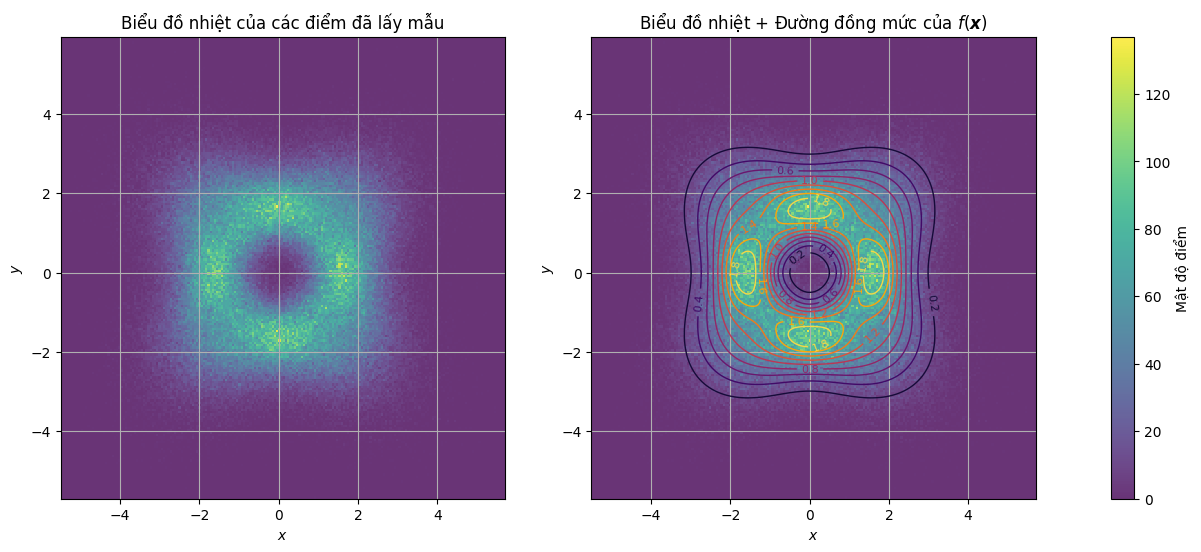

In [17]:
plot_samples_with_contour(f, p3_samples)

### Bonus: L·∫•y m·∫´u b·∫±ng MHSampler ƒë·ªÉ ki·ªÉm tra t√≠nh ƒë√∫ng ƒë·∫Øn

In [18]:
mh_sampler = MHSampler[np.ndarray](
    x0=np.array([0., 2.]),
    q_sampler=lambda x: (x[0] + np.random.normal(0, 1), x[1] + np.random.normal(0, 1)),
    f=f,
    # q=lambda x, y: np.exp(-((x[0]-y[0])**2 + (x[1]-y[1])**2) / (2 * std**2)),
    is_symmetric=True
)

# Burn-in phase
mh_sampler.burn_in(1_000)
# Sampling phase
p3_samples_mh = [
    mh_sampler.sample()
    for _ in tqdm(range(1_000_000), desc='Metropolis-Hastings Sampling')
]

Metropolis-Hastings Sampling: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000000/1000000 [00:05<00:00, 197793.26it/s]


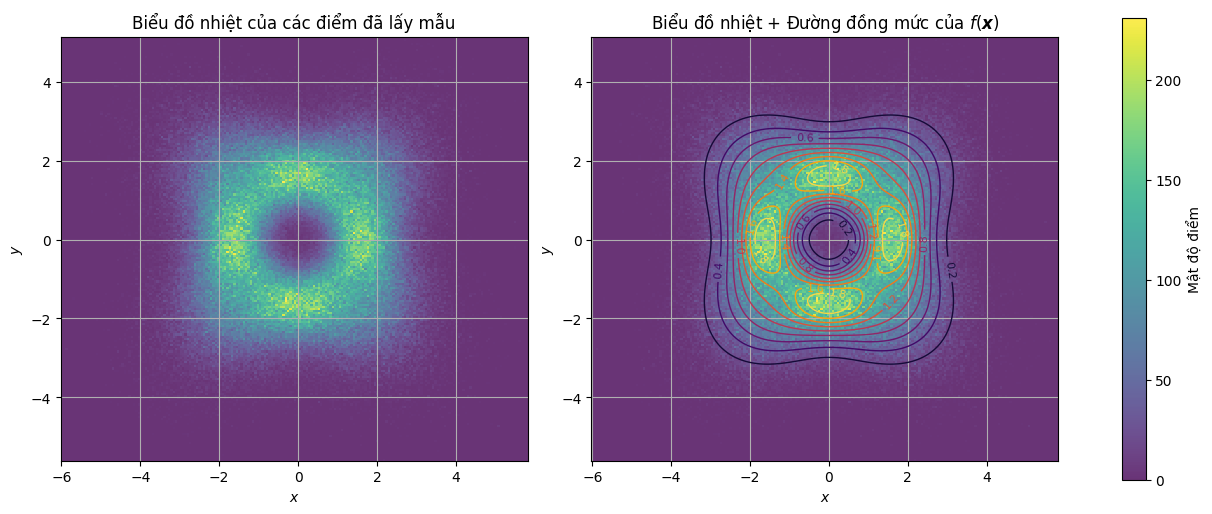

In [19]:
plot_samples_with_contour(f, p3_samples_mh)